<a href="https://colab.research.google.com/github/ksabhinaya/21eg107a18/blob/main/salaryprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Load the dataset


In [ ]:
df = pd.read_csv("/content/Salary_Data.csv")

In [ ]:
df.head()


,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
df.tail()


,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [ ]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
print(df.describe(include='all'))

       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


In [ ]:
df.shape

(30, 2)

In [ ]:
df.skew()

YearsExperience    0.37956
Salary             0.35412
dtype: float64

In [ ]:
df.kurt()

YearsExperience   -1.012212
Salary            -1.295421
dtype: float64

In [ ]:
df[['YearsExperience','Salary']].cov()

,YearsExperience,Salary
YearsExperience,8.053609,7.610630e+04
Salary,76106.303448,7.515510e+08


In [ ]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


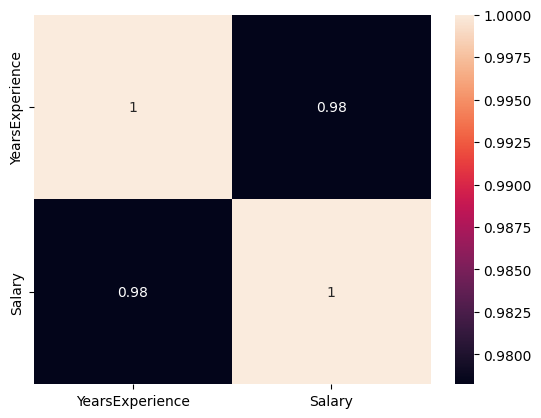

In [ ]:
sns.heatmap(df.corr(),annot=True)
plt.show()

independent and dependent varaiable

In [ ]:
X=df.drop('Salary',axis=1)
y=df.Salary
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


splitting data


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.30)

In [ ]:
X_test.shape

(9, 1)

develop model

In [ ]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [ ]:
LR.intercept_   # beta 0

26777.391341197625

In [ ]:
y_pred=LR.predict(X_test)
y_pred

array([ 40817.78327049, 123188.08258899,  65154.46261459,  63282.41035735,
       115699.87356004, 108211.66453108, 116635.89968866,  64218.43648597,
        76386.77615802])

evaluation

In [ ]:
from sklearn import metrics
R2=metrics.r2_score(y_test,y_pred)
R2

0.9740993407213511

In [ ]:
print(metrics.mean_absolute_error(y_test,y_pred))

3737.417861878896


In [ ]:
print(metrics.mean_squared_error(y_test,y_pred))

23370078.800832972


In [ ]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

4834.260936361728


In [ ]:
print(LR.predict([[5]]))

[73578.69777217]


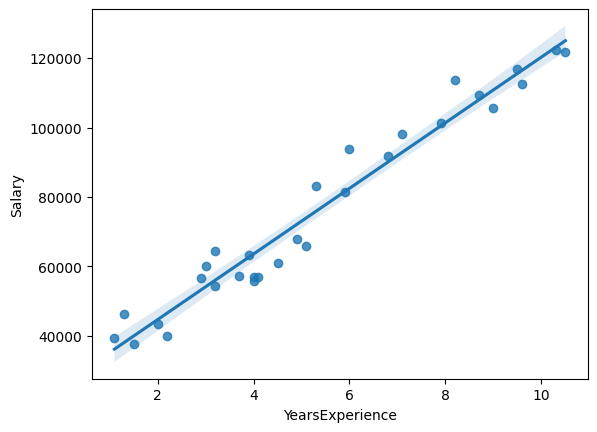

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X and y are your data arrays
sns.regplot(x=X, y=y)
plt.show()

In [ ]:
# Split into features (X) and target (y)
X = df.drop('Salary', axis=1)
y = df['Salary']


In [ ]:
salary_mean = df['Salary'].mean()

In [ ]:
predictions = ['High' if pred >= salary_mean else 'Low' for pred in y_pred]

In [ ]:

print("Threshold value for salary classification: {salary_mean}")

Threshold value for salary classification: {salary_mean}


In [ ]:
# Calculate RMSE
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

# Define an acceptable RMSE threshold
rmse_threshold = 5000

In [ ]:
if rmse <= rmse_threshold:
    print("Model performance is acceptable.")
else:
    print("Model performance is not acceptable. Consider improvements.")

# Print the RMSE value
print(f"RMSE: {rmse}")

Model performance is acceptable.
RMSE: 4834.260936361728
